In [203]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
!ls -la data

total 19696
drwxr-xr-x@ 7 vtrokhymenko  staff      224 Oct  7 15:56 .
drwxr-xr-x@ 5 vtrokhymenko  staff      160 Oct  7 21:22 ..
-rwxr-xr-x@ 1 vtrokhymenko  staff  7811316 Oct  6 16:38 Base1.txt
-rwxr-xr-x@ 1 vtrokhymenko  staff  2167387 Oct  6 16:38 Base2.txt
-rwxr-xr-x@ 1 vtrokhymenko  staff    23941 Oct  6 17:11 PetrenkoPetro_test.txt
-rwxr-xr-x@ 1 vtrokhymenko  staff    20903 Oct  6 16:38 test.txt
-rwxr-xr-x@ 1 vtrokhymenko  staff    49110 Oct  6 16:38 train.txt


### base1

In [3]:
base1=pd.read_table('data/Base1.txt')
print(len(base1))
base1.head(10)

54327


,ID,MONTH,V1,V2,V3,V4,V5,V6,V7,V8,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42
0,8145,6,58.109025,0.0,0.0,0.0000,0.0,0.0,0.00000,0.0,...,0.0,0.000000,380.878742,46.090732,59.619210,156.0,34.0,105.0,NaN,38463.0
1,8145,5,47.563425,NaN,0.0,0.0000,NaN,0.0,1.02209,NaN,...,1.0,0.000000,678.515429,9.773232,48.188819,178.0,14.0,69.0,68.0,38463.0
2,8145,4,56.376320,0.0,0.0,0.0000,0.0,0.0,0.00000,0.0,...,0.0,0.000000,297.892283,27.439968,62.335039,NaN,54.0,90.0,120.0,38463.0
3,8145,3,52.973415,0.0,0.0,0.0000,0.0,0.0,0.00000,0.0,...,0.0,0.000000,1169.362567,43.123166,132.589310,284.0,45.0,123.0,138.0,38463.0
4,8145,2,53.051500,0.0,0.0,0.0000,0.0,0.0,0.00000,0.0,...,0.0,0.000000,916.490745,8.738643,97.514241,154.0,15.0,65.0,NaN,38463.0
5,8145,1,45.916500,0.0,0.0,0.0000,0.0,0.0,0.00000,0.0,...,0.0,0.000000,1057.019876,0.000000,44.994246,265.0,0.0,58.0,67.0,38463.0
6,1299,6,44.069261,0.0,0.0,0.0000,0.0,0.0,0.00000,0.0,...,4.0,0.169691,738.649238,25.674880,17.497276,304.0,22.0,234.0,17.0,115054.0
7,1299,5,103.258865,NaN,0.0,0.0000,0.0,0.0,NaN,NaN,...,1.0,0.000000,725.971684,30.239253,11.709401,229.0,18.0,252.0,10.0,115054.0
8,1299,4,34.953612,0.0,0.0,0.0000,0.0,0.0,0.00000,0.0,...,12.0,NaN,677.328869,33.587492,13.309139,259.0,21.0,220.0,8.0,115054.0
9,1299,3,38.315589,0.0,0.0,2.8167,0.0,0.0,0.00000,0.0,...,2.0,0.000000,897.847308,18.538934,35.154564,294.0,21.0,322.0,13.0,115054.0


In [4]:
base1.fillna(0,inplace=True)
base1=base1.groupby('ID').mean().reset_index()
print(len(base1))
base1.head()

9267


,ID,MONTH,V1,V2,V3,V4,V5,V6,V7,V8,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42
0,1,3.5,31.461578,0.0,0.0,0.0,0.0,0.000000,0.000000,4.794469,...,0.000000,0.000000,649.306456,7.200075,7.809452,277.333333,2.500000,163.833333,2.833333,88252.000000
1,2,3.5,43.862564,0.0,0.0,0.0,0.0,0.362853,1.365725,0.327563,...,2.500000,0.000000,745.474865,16.232850,20.330358,223.333333,27.500000,241.833333,24.000000,19801.333333
2,3,5.0,54.490104,0.0,0.0,0.0,0.0,0.000000,0.310603,2.172716,...,0.333333,0.000000,45.242663,1.351182,0.000000,72.333333,1.333333,48.333333,0.000000,25857.000000
3,4,3.5,41.189648,0.0,0.0,0.0,0.0,0.000000,0.000000,1.779928,...,1.333333,0.000000,386.507165,6.966414,15.434766,263.000000,2.166667,70.666667,4.833333,539772.500000
4,5,3.5,41.305167,0.0,0.0,0.0,0.0,0.330057,3.035153,0.081457,...,23.500000,22.074357,384.098086,4.180967,20.227097,340.833333,10.833333,390.500000,20.500000,20145.833333


### base2

In [5]:
base2=pd.read_table('data/Base2.txt')
print(len(base2))
base2.head()

9267


,ID,T1,T2,T3,T4
0,1299,525ab75c928c6fac98a0f62e4da5316b7247ccd704c967...,b23c8d629d037531707dbb83e27932d879cb9f2a57c960...,68c03829c28a08159e587ba32f165c445276f7ca972481...,1dc161f26f37ac639bf14c645a4b9c24f0da5f96a83643...
1,4621,271f93f45e9b4067327ed5c8cd30a034730aaace438280...,a4b709af5eb19e6494158f9e3a67696411d8a7cd7e0b5d...,c0ce54b6e4c805bfb735491cfcffe9d846683fe764e974...,1af3d6dcce2a230337ff5bbf4e1065307ccbe923a41ba0...
2,4775,271f93f45e9b4067327ed5c8cd30a034730aaace438280...,a4b709af5eb19e6494158f9e3a67696411d8a7cd7e0b5d...,d0b8d1d417a45c7c58202f55cbb617865f1ef72c606f9b...,891199ade0cf46baaaeae0397521944517df106bf10410...
3,5860,525ab75c928c6fac98a0f62e4da5316b7247ccd704c967...,a4b709af5eb19e6494158f9e3a67696411d8a7cd7e0b5d...,d0b8d1d417a45c7c58202f55cbb617865f1ef72c606f9b...,7cf41b2f4c3426118b7e9a6117ebd7effced7f75d3dc9b...
4,8500,1c18a39e0bd33685c5684a50010cf67a80f2524417f0a2...,6834100708ea13d5f4d662c26e1e3a2786201f9f9da7be...,6722cc364817dd7f866a20b09f5040464cb847e1ee5b34...,5283565b4d1a49f1e59392f95b44256172e0e44fea2f4c...


#### LabelEncoder for [T1...T4]

In [289]:
le = LabelEncoder()

In [291]:
base2.iloc[:,-4:]=base2.iloc[:,-4:].apply(le.fit_transform)
base2.head()

,ID,T1,T2,T3,T4
0,1299,11,6,63,170
1,4621,4,4,114,152
2,4775,4,4,123,750
3,5860,11,4,123,688
4,8500,3,1,60,453


In [292]:
list(le.classes_)

['00106abf87004baae2065cbcfa94b4ee7ebcc34f70c65496ca42d3bd',
 '002815b9f0af520fd49465718813ea2c34458e2ef6bc38b3774ec31e',
 '004c037948fd3ce0d52f21277f9de2f85ccb118b4dc72f7bfa5a7f4b',
 '00d961b5ed740e8a86848f49356c4e8671f6468c6549f0bfbe59dff9',
 '00e759b3b5e63b92fe252ea0538d9727051a41ab6e741840fc229e2f',
 '0113e1647853e9784a7e508d13a7c9db773f622d4ade42a5a65244ee',
 '0139c42c4b9850598489124cd74c6ddb1540ea9eaf89c570414b2098',
 '0148ffa3d9a5723d8e86ee8b2a3cbea8e48a11f6141ec7319dfdfa12',
 '015390895560f5f7951d7a22a2b1c0e5fd9963056f321084141e37d0',
 '0159d0d280b0bab7fee89892f298b8afdfcf89d29a9aeb82ef904bf5',
 '015b855a946bee2f0662a9fcc948c523aad373d4ea6541f078cb5aac',
 '0181bd2346f18b90bcdc4632fd2311801ca2b2235d2398ad4c89496f',
 '01933591edef895da75e73ef1c713d9e64b03384f3a19c53c5ae7298',
 '019f9a138a3642ce0ff9d61fa7d495cb3dbe94caa95b4fd1e61b98ba',
 '01ae5faf49a7baf08c9fff0555250dd9e0efc50b8449a7c32cdad356',
 '020b0fa4b417b0047c3be4d67b2c37d7d20ff9b975c02910c8336da0',
 '020be98946fbca787fea60

In [293]:
len(list(le.classes_))

1394

## train

In [6]:
train=pd.read_table('data/train.txt')
train.head()

,ID,TARGET
0,3983,3
1,8810,1
2,3898,1
3,4590,3
4,8539,1


In [7]:
train.shape

(6229, 2)

---

## merge

In [294]:
merge=train.merge(base1).merge(base2)
merge['MONTH']=merge['MONTH'].astype(int)
merge.head()

,ID,TARGET,MONTH,V1,V2,V3,V4,V5,V6,V7,...,V37,V38,V39,V40,V41,V42,T1,T2,T3,T4
0,3983,3,3,232.795399,0.0,0.000000,0.150192,0.75174,0.000000,2.377877,...,49.257954,224.500000,81.833333,129.166667,40.666667,847095.833333,18,4,48,82
1,8810,1,3,204.387304,0.0,6.966133,0.865885,0.00000,47.582024,9.364657,...,157.843977,157.500000,45.500000,70.166667,89.166667,15763.000000,13,4,117,886
2,3898,1,3,36.071630,0.0,3.160872,3.388226,0.00000,0.000000,0.000000,...,27.197382,54.166667,1.000000,80.000000,4.000000,9482.000000,6,6,63,232
3,4590,3,3,41.542517,0.0,0.163616,0.193489,0.00000,0.000000,0.000000,...,2.217708,320.500000,6.500000,328.500000,3.666667,2134.666667,6,6,114,360
4,8539,1,3,90.823895,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,...,7.926432,384.333333,3.666667,274.000000,3.166667,559.000000,21,6,63,771


In [344]:
merge.MONTH.unique()

array([3, 5, 4, 6])

# visualization

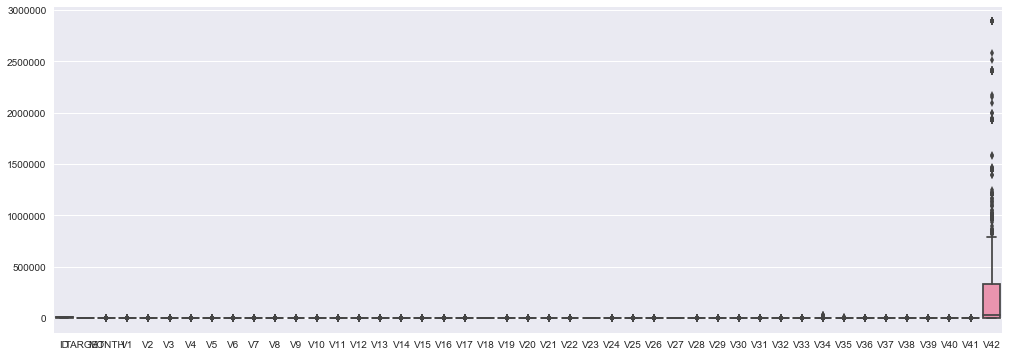

In [295]:
plt.figure(figsize=(17,6))
sns.boxplot(data=merge.iloc[:,:-4])

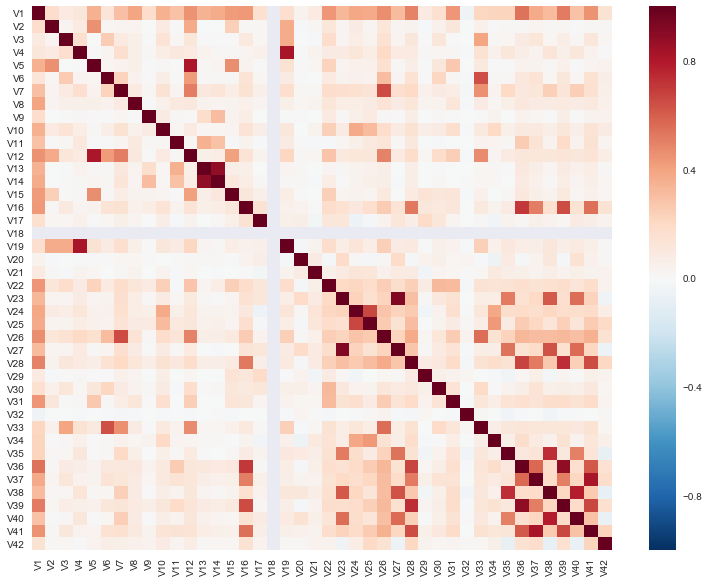

In [298]:
corr = merge.drop(['ID','TARGET','MONTH','T1','T2','T3','T4'],axis=1).corr()
plt.figure(figsize=(13,10))
sns.heatmap(corr)

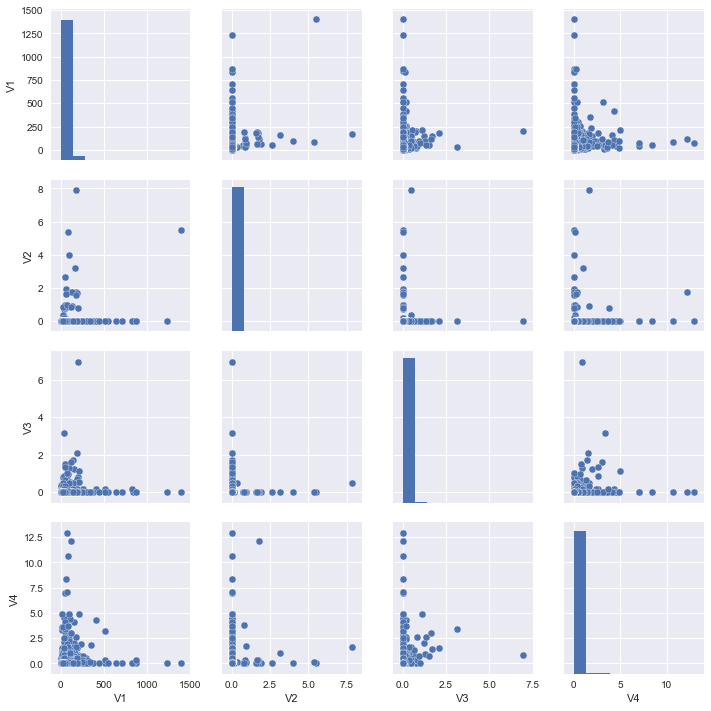

In [299]:
sns.pairplot(merge[['V1','V2','V3','V4']])

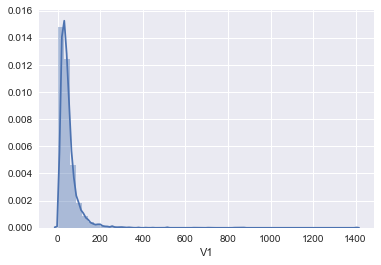

In [300]:
sns.distplot(merge.V1);

## train_test_split

In [301]:
X_train, X_test, y_train, y_test = train_test_split(merge.drop(['TARGET'],axis=1), merge['TARGET'], test_size=0.2, random_state=42)

# Learning

## lightgbm

In [302]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [303]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [304]:
%%time
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=30,
                valid_sets=lgb_eval,
                early_stopping_rounds=20)

[1]	valid_0's l2: 0.701417	valid_0's auc: 0.577655
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l2: 0.695499	valid_0's auc: 0.604081
[3]	valid_0's l2: 0.690743	valid_0's auc: 0.596917
[4]	valid_0's l2: 0.685885	valid_0's auc: 0.598548
[5]	valid_0's l2: 0.681517	valid_0's auc: 0.608596
[6]	valid_0's l2: 0.67851	valid_0's auc: 0.606698
[7]	valid_0's l2: 0.676039	valid_0's auc: 0.602627
[8]	valid_0's l2: 0.673729	valid_0's auc: 0.597445
[9]	valid_0's l2: 0.671586	valid_0's auc: 0.597232
[10]	valid_0's l2: 0.66851	valid_0's auc: 0.602041
[11]	valid_0's l2: 0.666105	valid_0's auc: 0.601174
[12]	valid_0's l2: 0.664024	valid_0's auc: 0.597037
[13]	valid_0's l2: 0.662368	valid_0's auc: 0.597014
[14]	valid_0's l2: 0.660283	valid_0's auc: 0.600525
[15]	valid_0's l2: 0.658809	valid_0's auc: 0.600428
[16]	valid_0's l2: 0.657203	valid_0's auc: 0.596565
[17]	valid_0's l2: 0.656078	valid_0's auc: 0.592561
[18]	valid_0's l2: 0.654951	valid_0's auc: 0.58957
[19]	valid_0's

In [305]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [306]:
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred.astype(int)))

The accuracy of prediction is: 0.38202247191


## xgboost

In [339]:
%%time
model = XGBClassifier(max_depth=5, n_estimators=300, learning_rate=0.05,seed=27,gamma=0.8)
model.fit(X_train, y_train)

CPU times: user 31 s, sys: 175 ms, total: 31.2 s
Wall time: 8.34 s


In [340]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.4478330658105939

#### test with kfold

In [309]:
#merge_x=merge.drop(['TARGET'],axis=1)
#merge_y=merge['TARGET']

model_x = XGBClassifier(max_depth=5, n_estimators=300, learning_rate=0.05,seed=27,gamma=0.8)
kfold_x = StratifiedKFold(n_splits=10, random_state=7)
results_x = cross_val_score(model_x, merge_x, merge_y, cv=kfold_x)
print('accuracy= ',results_x.mean()*100)

accuracy=  44.1326984123


# pca

In [315]:
pca = PCA(n_components=2)

In [316]:
pca.fit(X_train)
x_train_pc = pca.transform(X_train)

In [317]:
pca.fit(X_test)
x_test_pc = pca.transform(X_test)

In [318]:
%%time
model = XGBClassifier(max_depth=5, n_estimators=300, learning_rate=0.05,seed=27,gamma=0.7)
model.fit(x_train_pc, y_train)

CPU times: user 6.5 s, sys: 238 ms, total: 6.74 s
Wall time: 2.06 s


In [319]:
y_pred = model.predict(x_test_pc)
accuracy_score(y_test, y_pred)

0.38603531300160515

### if we use only 	one month

In [347]:
%%time
for i in merge.MONTH.unique():
    print(40*'-')
    merge3=merge.copy()
    merge3=merge3[merge3['MONTH']==i]
    print('shape in {}th month = {}'.format(i,merge3.shape))
    
    X_train3, X_test3, y_train3, y_test3 = train_test_split(merge3.drop(['TARGET'],axis=1), merge3['TARGET'], test_size=0.2, random_state=42)
    
    model3 = XGBClassifier(max_depth=5, n_estimators=300, learning_rate=0.05,seed=30,gamma=0.8)
    model3.fit(X_train3, y_train3)
    
    y_pred3 = model3.predict(X_test3)
    acc=accuracy_score(y_test3, y_pred3)
    
    print('acc in {}th month = {}'.format(i,acc))
print(40*'-')

----------------------------------------
shape in 3th month = (5941, 49)
acc in 3th month = 0.4693019343986543
----------------------------------------
shape in 5th month = (132, 49)
acc in 5th month = 0.3333333333333333
----------------------------------------
shape in 4th month = (106, 49)
acc in 4th month = 0.3181818181818182
----------------------------------------
shape in 6th month = (50, 49)
acc in 6th month = 0.1
----------------------------------------
CPU times: user 32.4 s, sys: 122 ms, total: 32.5 s
Wall time: 8.36 s


## RandomForestClassifier

In [324]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [325]:
clf.predict(X_test)

array([2, 1, 1, ..., 1, 2, 0])

In [326]:
accuracy_score(y_test, clf.predict(X_test))

0.398876404494382

## GradientBoostingClassifier

In [327]:
#X_train3, X_test3, y_train3, y_test3 = train_test_split(merge3.drop(['TARGET'],axis=1), merge3['TARGET'], test_size=0.2, random_state=42)
merge_x=merge.drop(['TARGET'],axis=1)
merge_y=merge['TARGET']

In [328]:
seed = 42
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)

In [329]:
%%time
results = model_selection.cross_val_score(model, merge_x, merge_y, cv=kfold)

CPU times: user 1min 1s, sys: 491 ms, total: 1min 1s
Wall time: 1min 2s


In [330]:
results.mean()

0.44276166046461213

## Ensemble

In [331]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [332]:
estimators = []

In [333]:
model1 = GradientBoostingClassifier()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
model3 = XGBClassifier(max_depth=5, n_estimators=300, learning_rate=0.05,seed=27,gamma=0.7)
estimators.append(('xgb_c', model3))

In [334]:
ensemble = VotingClassifier(estimators)

In [335]:
%%time
results = model_selection.cross_val_score(ensemble, merge_x, merge_y, cv=kfold)

CPU times: user 7min 51s, sys: 4.36 s, total: 7min 55s
Wall time: 3min 32s


In [336]:
print(results.mean())

0.424303623686


---

# predict for test data

In [491]:
sample_submit=pd.read_table('data/PetrenkoPetro_test.txt')
sample_submit.head(3)

,ID,TARGET
0,9261,2
1,9099,1
2,8190,0


In [492]:
test=pd.read_table('data/test.txt')
test.head(3)

,ID,TARGET
0,2203,NaN
1,6453,NaN
2,5795,NaN


In [493]:
merge_test=test.drop(['TARGET'],axis=1).merge(base1).merge(base2)
merge_test['MONTH']=merge_test['MONTH'].astype(int)
merge_test.head()

,ID,MONTH,V1,V2,V3,V4,V5,V6,V7,V8,...,V37,V38,V39,V40,V41,V42,T1,T2,T3,T4
0,2203,3,41.527071,0.0,0.0,0.000000,0.385425,0.18188,1.165013,0.091074,...,11.300730,55.500000,1.833333,48.833333,5.666667,39283.5,18,4,114,111
1,6453,3,14.855203,0.0,0.0,1.264195,0.000000,0.00000,0.182957,3.980221,...,4.787573,54.333333,6.333333,191.166667,1.500000,19659.0,11,6,114,1272
2,5795,3,0.281310,0.0,0.0,0.000000,0.000000,0.00000,0.105299,0.000000,...,5.520098,1.666667,0.000000,29.333333,5.333333,1452887.0,15,4,114,828
3,843,3,5.238460,0.0,0.0,0.000000,0.000000,0.00000,0.458235,0.000000,...,0.784879,12.500000,0.166667,11.666667,0.666667,50591.0,15,6,63,458
4,378,3,8.480091,0.0,0.0,0.000000,0.000000,0.00000,0.325954,0.000000,...,4.844368,11.000000,0.333333,134.666667,3.166667,741.0,13,1,63,1153


In [494]:
merge_test.shape

(3038, 48)

In [495]:
merge_test.MONTH.value_counts()

3    2890
4      70
5      54
6      24
Name: MONTH, dtype: int64

In [496]:
%%time
model_t = XGBClassifier(max_depth=5, n_estimators=300, learning_rate=0.05,seed=27,gamma=0.8)
model_t.fit(merge.drop(['TARGET'],axis=1), merge['TARGET'])

CPU times: user 38.4 s, sys: 220 ms, total: 38.6 s
Wall time: 10.4 s


In [497]:
y_test_pred = model_t.predict(merge_test)
y_test_pred

array([2, 1, 1, ..., 1, 1, 2])

In [498]:
print(len(y_test_pred))
print(len(merge_test))

3038
3038


In [499]:
data = {'ID':merge_test.ID.values,'TARGET':y_test_pred}
submit = pd.DataFrame(data)
submit.head()

,ID,TARGET
0,2203,2
1,6453,1
2,5795,1
3,843,2
4,378,2


In [500]:
data2= {'ID': sample_submit.ID.values, 
        'TARGET': 0}
qq=pd.DataFrame(data2)
qq.head()

,ID,TARGET
0,9261,0
1,9099,0
2,8190,0
3,7154,0
4,7191,0


In [501]:
for i,qq_id in enumerate(qq.ID.values):
    for j,m_id in enumerate(submit.ID.values):
        if(qq_id==m_id):
            qq.TARGET[i]=submit.TARGET[j]

In [535]:
#qq[qq['TARGET']==3]
qq.head(30)

,ID,TARGET
0,9261,2
1,9099,2
2,8190,1
3,7154,1
4,7191,2
5,4418,2
6,9257,1
7,4677,1
8,388,1
9,8566,1


test


In [536]:
ww=2533
print(qq[qq['ID']==ww])
print(submit[submit['ID']==ww])

      ID  TARGET
18  2533       1
        ID  TARGET
2037  2533       1


In [509]:
len(qq)

3038

In [516]:
qq.head()

,ID,TARGET
0,9261,2
1,9099,2
2,8190,1
3,7154,1
4,7191,2


save to txt and checking

In [537]:
qq.to_csv('TrokhymenkoViktor_test.txt',header=True, index=False, sep='\t')

In [538]:
pd.read_table('TrokhymenkoViktor_test.txt')

,ID,TARGET
0,9261,2
1,9099,2
2,8190,1
3,7154,1
4,7191,2
5,4418,2
6,9257,1
7,4677,1
8,388,1
9,8566,1
